# Проектная работа
# Принятие решений в бизнесе на основе данных

**Описание проекта**

Вместе с отделом маркетинга необходимо подготовить список гипотез для увеличения выручки.
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Представлены данные по гипотезам и А/В тесту  


**План работы**

**Часть 1. Приоритизация гипотез.**

1.Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
2.Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.  
3.Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.  

**Часть 2. Анализ A/B-теста**

Проведен A/B-тест и получены результаты.

Задача

Проанализировать A/B-тест:
1.Построить график кумулятивной выручки по группам. Сделать выводы и предположения.  
2.Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.  
3.Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.  
4.Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.  
5.Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.  
6.Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.  
7.Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.  
8.Построить точечный график стоимостей заказов. Сделать выводы и предположения.  
9.Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.  
10.Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным. Сделать выводы и предположения.  
11.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.  
12.Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделать выводы и предположения.  
13.Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.  
14.Принять решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Загрузка данных и подготовка их к анализу

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.options.display.float_format = '{:.2f}'.format # формат отображения
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', 1000)
import warnings
warnings.filterwarnings('ignore') # отключение предупреждений

Сохраним данные в переменные.

In [2]:
hypothesis = pd.read_csv(r'C:\\dataset_praktikum/hypothesis.csv') # гипотезы
orders = pd.read_csv(r'C:\\dataset_praktikum/orders.csv') # заказы
visitors = pd.read_csv(r'C:\\dataset_praktikum/visitors.csv') # визиты

Изучим данные.

Рассмотрим таблицу hypothesis.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.columns = hypothesis.columns.str.lower() # приведение названия столбцов к нижнему регистру

Рассмотрим таблицу orders.

In [36]:
display(orders.head())
orders.info() # общая информация
display(orders.duplicated().sum()) # проверка на дубликаты
# статистическая информация
orders.describe()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   int64         
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


0

,transactionId,visitorId,revenue
count,1016.00,1016.00,1016.00
mean,2155084621.11,2128676536.37,8300.81
std,1234371920.23,1221578489.67,42121.99
min,1062393.00,5114589.00,50.00
25%,1143481362.50,1043654735.75,1190.00
50%,2144498593.00,2150274199.50,2955.00
75%,3256513229.00,3146990608.50,8134.25
max,4288552432.00,4283872382.00,1294500.00


In [6]:
# изменение типа данных
orders['date'] = pd.to_datetime(orders['date'])

Рассмотрим таблицу visitors.

In [37]:
display(visitors.head())
visitors.info() # общая информация
display(visitors.duplicated().sum()) # проверка на дубликаты
# статистическая информация
visitors.describe()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


0

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [8]:
# изменение типа данных
visitors['date'] = pd.to_datetime(visitors['date'])

**Вывод по предварительной обработке данных**

Данные представлены в хорошем виде, существенных изменений не проводилось.

In [9]:
visitors.groupby('group')['visitors'].sum()/visitors.visitors.sum()*100

group
A   49.76
B   50.24
Name: visitors, dtype: float64

Пользователи разделены на группы 50/50.

Найдем пользователей которые попали в две группы и удалим их заказы.

In [10]:
flickers = orders.groupby('visitorId')['group'].nunique().reset_index().query('group > 1')

In [38]:
flickers.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [12]:
# вычислим долю flickers в % (пользователи с двумя группами)
len(flickers)/orders.visitorId.nunique()*100

5.625606207565471

Удалим заказы данных пользователей.

In [13]:
orders = orders.loc[~orders['visitorId'].isin(flickers.visitorId)]

## Часть 1. Приоритизация гипотез.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Фреймворк ICE состоит из трех компонент:    
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
Efforts — сколько стоит протестировать эту гипотезу.

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [14]:
hypothesis['number_hypothesis'] = range(1,10) # нумерация гипотез

In [15]:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
display(hypothesis[['number_hypothesis', 'hypothesis', 'ice']].sort_values('ice', ascending=False))

,number_hypothesis,hypothesis,ice
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE: 9, 1, 8, 7.

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Фреймворк RICE состоит из четырех компонент:  
Reach — скольких пользователей затронет изменение, которое вы хотите внести;  
Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
Efforts — сколько стоит протестировать эту гипотезу.

$$RICE = \frac{Reach * Impact * Confidence}{Efforts}$$

In [16]:
hypothesis['rice'] = hypothesis['ice'] * hypothesis['reach']
display(hypothesis[['number_hypothesis', 'hypothesis', 'rice']].sort_values('rice', ascending=False))

,number_hypothesis,hypothesis,rice
7,8,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,7,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,9,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,4,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,2,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,5,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7.

**Вывод по приоритизации гипотез**

Приоритизация гипотез при применении RICE вместо ICE немного поменялась, так получилось, потому что параметр Reach (охват пользователей) у гипотез разный.

## Часть 2. Анализ A/B-теста

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' :'nunique', 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
                                        .sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

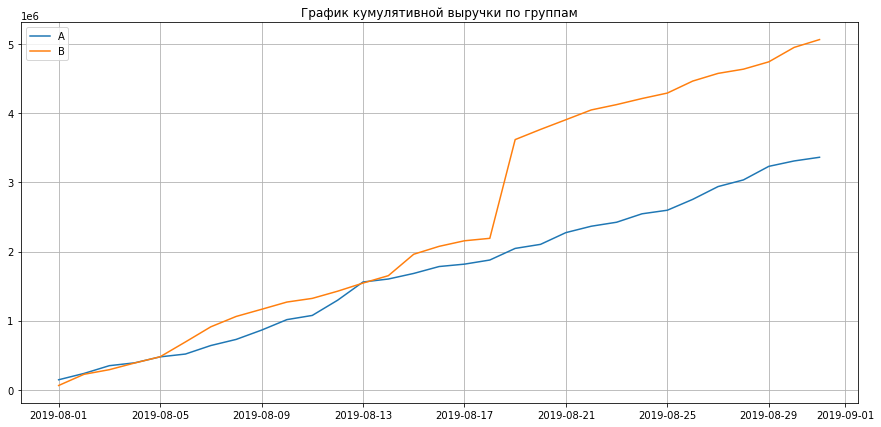

In [18]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,7))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки по группам')

plt.show()

Кумулятивная выручка группы В лидирует практически на всем протяжении и в середине теста резко увеличивается. Резкий рост может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке в группе В.

### Постройм график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

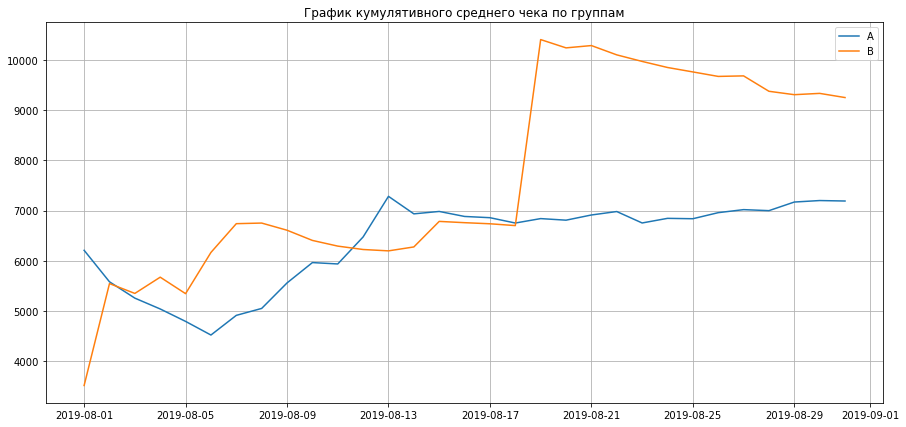

In [19]:
plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.legend()
plt.grid()
plt.show()

Кумулятивное значение среднего чека по сегментам колеблется, чаще выше у группы B, во второй половине теста просиходит резкий скачок вверх у группы В, после чего начинает снижаться, также есть небольшой "всплеск" у группы А 2019-08-13. Требуется дополнительный анализ выбросов.

### Постром график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

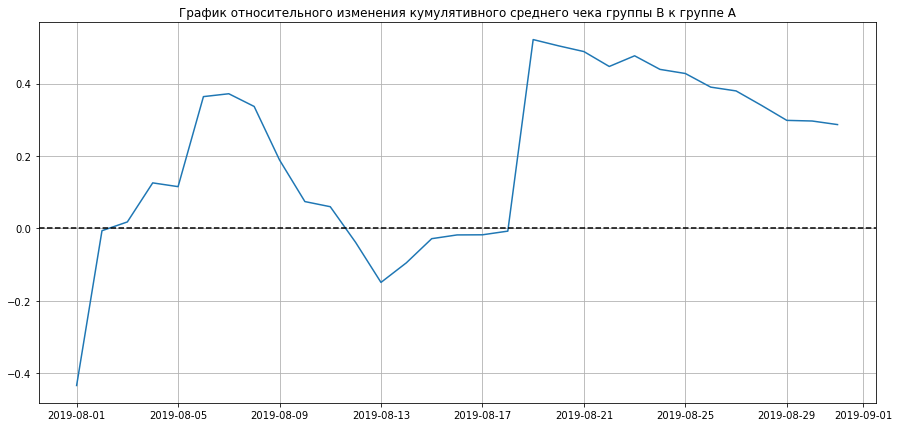

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='right', suffixes=['A', 'B'])
plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Видимо тогда были совершены аномальные заказы.

### Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

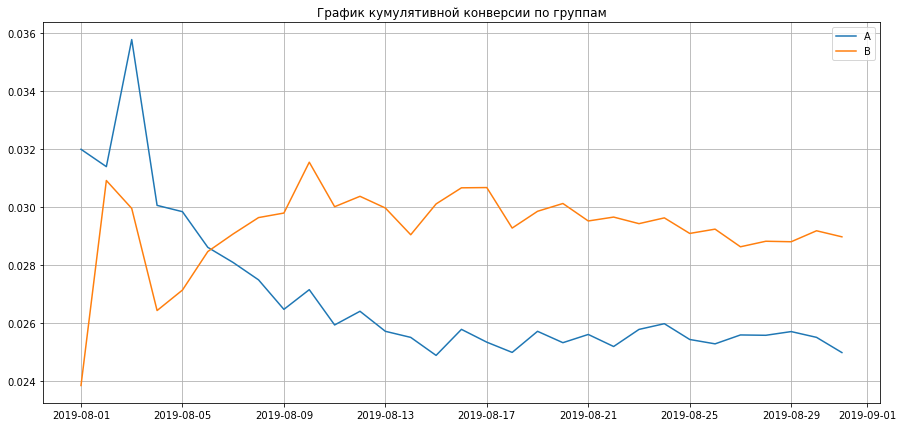

In [21]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам')
# задаем масштаб осей
#plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.grid()
plt.show()

Кумулятивная конверсия группы B c 2019-08-09 вырвалась вперед и зафиксировалась, а конверсия группы А осталась на режнем уровне до конца теста.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

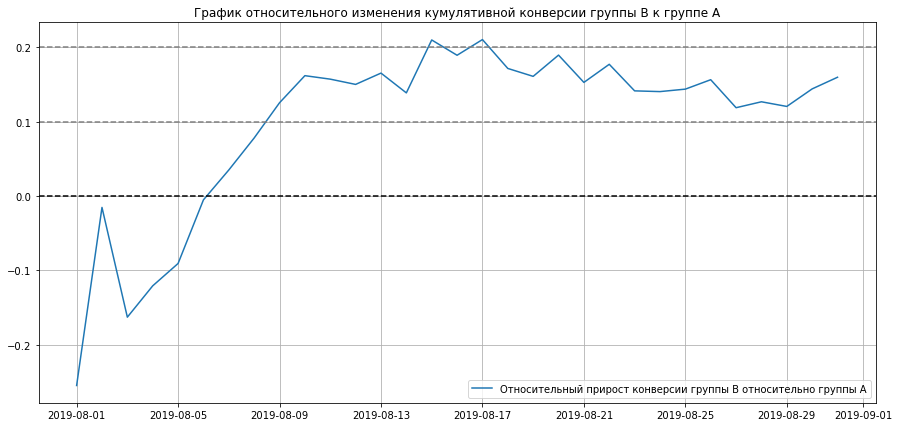

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
#plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5])
plt.grid()
plt.show()

Почти с самого начала группа В лидирует по конверсии по отношению к группе А на 10-20 %.

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

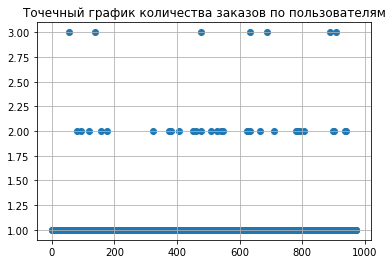

In [23]:
ordersByUsers = (
   orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.grid()
plt.show()

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [24]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5 % пользователей совершали больше одного заказа. И не более 1 % пользователей- больше 2. За верхнюю границу возьмем 2 заказа включительно.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

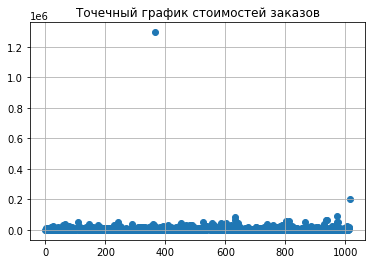

In [25]:
x_values2 = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values2, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.grid()
plt.show()

Заказов с анамальной стоимостью не очень много.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более чем у 5 % заказов чек дороже 26785. И не больше чем у 1 % заказов - дороже 53904. За верхнюю границу возьмем 26785 включительно.

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

In [27]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head())


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
* visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

In [28]:
# количество заказов на каждого пользователя
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [29]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [30]:
alpha = 0.05 # критический уровень статистической значимости
# применим тест Манна-Уитни
# сформулируем гипотезы
# Н0 - конверсия группы А не отличается от конверсии группы В
# Н1 - конверсия группы А отличается от конверсии группы В
print('P-value =', "{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

# относительное различие в конверсии между группами
print("{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

P-value = 0.0055
0.160


P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых данных" сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост группы В к конверсии группы А равен 16 %.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [31]:
alpha = 0.05 # критический уровень статистической значимости
# применим тест Манна-Уитни
# сформулируем гипотезы
# Н0 - средний чек заказа группы А не отличается от среднего чека заказа группы В
# Н1 - средний чек заказа группы А отличается от среднего чека заказа группы В
print('P-value =', '{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
# относительные различия в среднем чеке между группами
print('{0:.4f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value = 0.4147
0.2866


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.


Примем за аномальных пользователей тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 26785.

Найдем аномальных пользователей.

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [33]:
# количество аномальных пользователей
len(abnormalUsers)

58

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

In [34]:
# количество заказов на каждого пользователя
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

alpha = 0.05 # критический уровень статистической значимости
# применим тест Манна-Уитни
# сформулируем гипотезы
# Н0 - конверсия группы А не отличается от конверсии группы В
# Н1 - конверсия группы А отличается от конверсии группы В
print('P-value =', '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
# относительное различие в конверсии между группами
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value = 0.00618
0.182


Как и в случае с сырыми данными, статистическая значимость достигнута (P-value меньше 0.05). Сегмент В лучше сегмента А.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [35]:
alpha = 0.05 # критический уровень статистической значимости
# применим тест Манна-Уитни
# сформулируем гипотезы
# Н0 - средний чек заказа группы А не отличается от среднего чека заказа группы В
# Н1 - средний чек заказа группы А отличается от среднего чека заказа группы В
print('P-value =', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

P-value = 0.323
-0.048


Как и в случае с сырыми данными, P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B меньше на 4,8 % среднего чека группы A (в "сырых" данных был больше на 28,7 %).



<div style="border:solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Проверки выполнены корректно, результаты интерпретированы верно!</div> <br>
<div style="border:solid red 2px; padding: 20px"> <b>Что необходимо доработать</b><br>
В комментариях ты упоминаешь нулевую гипотезу, попрощу тебя сформулировать гипотезы в терминах - <b>нулевая и альтернативная</b></div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px">Сформулировал гипотезы в терминах.</div>

### Примем решение по результатам теста и объясним его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Имеющиеся факты:

Есть статистически значимое различие по конверсии между группами по «сырым», и по данным после фильтрации аномалий (группа В лучше группы А);

Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Средний чек группы B меньше на 2 % среднего чека группы A (в "сырых" данных был больше на 26 %);

График различия конверсии между группами сообщает, что почти с самого начала группа В лидирует по конверсии по отношению к группе А на 10-20 %;

График различия среднего чека колеблется (на него вляют аномальные пользователи). Сделать из этого графика определённые выводы нельзя.



**Рекомендуется продолжить тест** пока график по среднему чеку не стабилизируется.

# Общий вывод

В данном проекте были приоритизированы гипотезы, запущен A/B-тест и проанализированы результаты.

1. Наиболее перспективные гипотезы по RICE: 8, 3, 1, 7. Наиболее перспективные гипотезы по ICE: 9, 1, 8, 7.

2. Исходя из результатов проведения A/B-теста рекомендуется его продолжить, т.к. есть статистически значимое различие по конверсии между группами по «сырым», и по данным после фильтрации аномалий (группа В лучше группы А), но средние чеки и выручка примерно на одном уровне.

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Дмитрий, ты хорошо выполнил проект: приоритезировал гипотезы, отлично проанализировал динамику и стабильность кумулятивных метрик, нашел и устранил выбросы в данных.

<span style="color:red">Осталось сформулировать гипотезы</span>

_По решению теста_

Давай распишем от чего зависит выручка:

**Выручка = Средний чек х Покупатели**

**Покупатели = Конверсия х Посетители**

Конверсию мы значимо повысили, графики стабильны.

Исправляй и отправляй на проверку🛠